Enis thesis questions:
    
    the following notebook is a quick exercise (code by Dr. Candace Makeda Moore). Please change it if you plan to make it into a binder.
    

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rc
from datetime import datetime
from datetime import date
from pandas.tseries.offsets import DateOffset
import math as mth
import datetime as dt
from IPython.display import Markdown, display
from matplotlib import pylab
import pylab as p

In [2]:
#import MOH dataset from Dr. Moore's desktop
moh= pd.read_csv('D:/MAXCORlabwork/for_enis_thesis/covid19-data-israel-23022021.csv')
#D:\MAXCORlabwork\for_enis_thesis

In [3]:
moh.head(5)

,תאריך,מספר בדיקות מצטבר,מספר חולים מאושפזים,מספר חולים מונשמים,מספר חולים מצטבר,מספר חולים קשה,מספר נפטרים מצטבר
0,26/01/2020 00:00:00,132,0,0,7,0,0
1,27/01/2020 00:00:00,133,0,0,7,0,0
2,28/01/2020 00:00:00,133,0,0,7,0,0
3,29/01/2020 00:00:00,139,0,0,7,0,0
4,30/01/2020 00:00:00,143,0,0,7,0,0


In [4]:
moh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   תאריך                395 non-null    object
 1   מספר בדיקות מצטבר    395 non-null    object
 2   מספר חולים מאושפזים  395 non-null    object
 3   מספר חולים מונשמים   395 non-null    int64 
 4   מספר חולים מצטבר     395 non-null    object
 5   מספר חולים קשה       395 non-null    object
 6   מספר נפטרים מצטבר    395 non-null    object
dtypes: int64(1), object(6)
memory usage: 21.7+ KB


In [5]:
print(moh.columns)

Index(['תאריך', 'מספר בדיקות מצטבר', 'מספר חולים מאושפזים',
       'מספר חולים מונשמים', 'מספר חולים מצטבר', 'מספר חולים קשה',
       'מספר נפטרים מצטבר'],
      dtype='object')


In [6]:
# rename columns
moh =  moh.rename(columns=
                  {'מספר חולים קשה': "number_kashim",
                   'מספר חולים מונשמים': "total_intubated",
                   'מספר נפטרים מצטבר':'deaths',
                  'תאריך': "date",
                  'מספר בדיקות מצטבר': "number_tests",
                   #'חולים מאושפזים': "number_admitted",
                   'מספר חולים מצטבר':"number_sick",
                  'מספר חולים מאושפזים': "patients_admitted"})

In [7]:
# reformat the deaths number towards a number
moh['total_deaths_n'] = moh['deaths'].str.replace(',', '')
moh['total_deaths_n'] = pd.to_numeric(moh['total_deaths_n'])

In [8]:
# let's count all the NaNs in this dataframe
moh.isna().sum().sum()

0

In [9]:
# great our dataframe is pristine, but we will create a NaN with the follwing operation:
# we can add a column for daily deaths by subtracting the total deaths from the deaths the day before
moh['daily_deaths']= moh['total_deaths_n']-  moh['total_deaths_n'].shift()

In [10]:
# let's zero that NaN
moh['daily_deaths'] = moh['daily_deaths'].fillna(0)
# and check again
moh.isna().sum().sum()

0

In [11]:
# let's work with the date data
moh ['date_as_date'] = pd.to_datetime(moh.date, format= '%d/%m/%Y %H:%M:%S')

In [12]:
# OK, now let's check the data  negative death numbers specifically. 
moh['daily_deaths'][moh['daily_deaths'] < 0].count()

0

In [13]:
moh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               395 non-null    object        
 1   number_tests       395 non-null    object        
 2   patients_admitted  395 non-null    object        
 3   total_intubated    395 non-null    int64         
 4   number_sick        395 non-null    object        
 5   number_kashim      395 non-null    object        
 6   deaths             395 non-null    object        
 7   total_deaths_n     395 non-null    int64         
 8   daily_deaths       395 non-null    float64       
 9   date_as_date       395 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 31.0+ KB


In [14]:
# we want the number of kashe patients as a number
moh['number_kashim'] = moh['number_kashim'].str.replace(',', '')
moh['number_kashim'] = pd.to_numeric(moh['number_kashim'])

In [15]:
# to check everything we need to switch the numbers that are strings into real numbers
# so let's first drop what we don't want
moh = moh.drop(['number_tests',
                'total_deaths_n',
               'deaths',
               'patients_admitted',
               'number_sick',
               ],
               axis = 1)
moh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             395 non-null    object        
 1   total_intubated  395 non-null    int64         
 2   number_kashim    395 non-null    int64         
 3   daily_deaths     395 non-null    float64       
 4   date_as_date     395 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 15.6+ KB


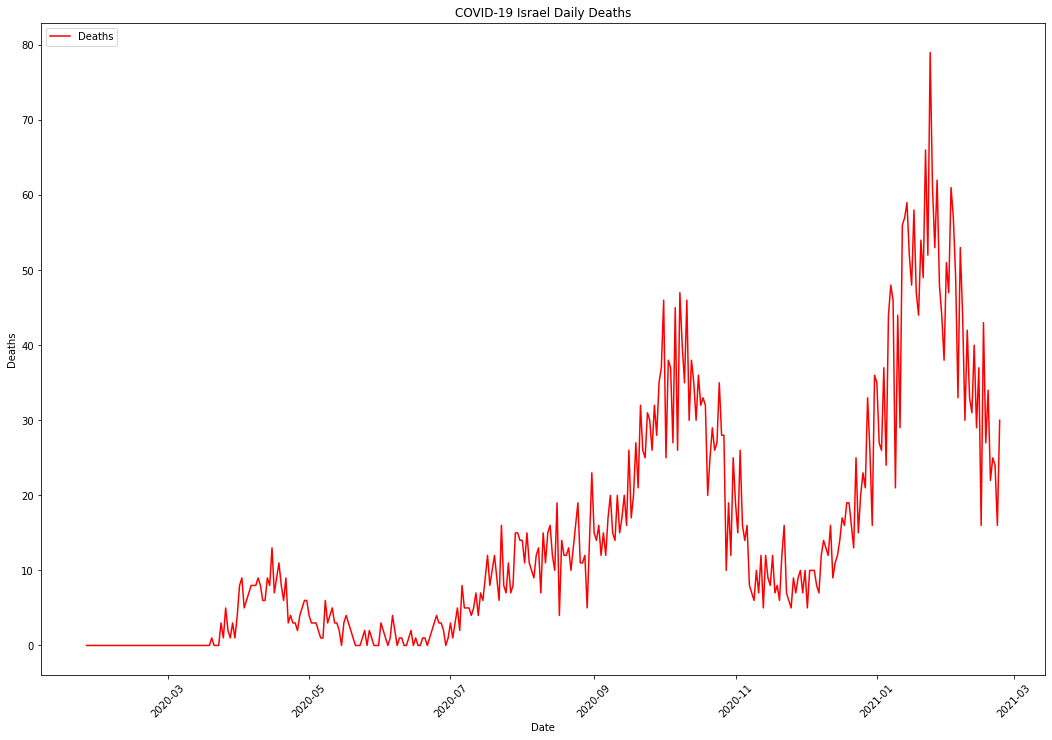

In [61]:
# here optionally we can take a look at those deaths, and make sure we don't have real outliers
fig, ax = plt.subplots(figsize=(18, 12))

# Add x-axis and y-axis
ax.plot(moh.date_as_date,
       moh['daily_deaths'],
       label='Deaths',
       color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Deaths",
       title="COVID-19 Israel Daily Deaths")

plt. xticks(rotation=45)
plt.legend(loc='upper left')
# put in lines for lockdowns

In [17]:
# OK let's look athe OSI you sent now
osi = pd.read_csv('D:/MAXCORlabwork/for_enis_thesis/osi.csv')

D:\bin\anaconda3\envs\cleanx\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
osi.tail(5)

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay\
193124,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210907.0,NaN,NaN,NaN,NaN,...,NaN,78.7,NaN,84.52,NaN,62.5,NaN,71.43,NaN,0.00\
193125,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210908.0,NaN,NaN,NaN,NaN,...,NaN,78.7,NaN,84.52,NaN,62.5,NaN,71.43,NaN,0.00\
193126,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210909.0,NaN,NaN,NaN,NaN,...,NaN,78.7,NaN,84.52,NaN,62.5,NaN,71.43,NaN,0.00\
193127,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20210910.0,NaN,NaN,NaN,NaN,...,NaN,78.7,NaN,84.52,NaN,62.5,NaN,71.43,NaN,0.00\
193128,},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# What you sent me is everything...let's just use a dataframe I have of the Israeli values. To see how it was derived go to hthe lab's public Github
makeda_osi = pd.read_csv('D:/MAXCORlabwork/for_enis_thesis/chosen_stringency_today4.csv')

In [20]:
makeda_osi.head(5)

,Unnamed: 0,date_as_date,Stringency_index_in_Israel
0,95142,2020-01-01,0.0
1,95143,2020-01-02,0.0
2,95144,2020-01-03,0.0
3,95145,2020-01-04,0.0
4,95146,2020-01-05,0.0


In [21]:
# drop off the numbering column from the bigger frame
makeda_osi = makeda_osi.drop(['Unnamed: 0'],axis = 1)

In [22]:
makeda_osi.isna().sum().sum()

5

In [23]:
# and now let's check my suspicioin they are on the tail of the data we will cut anyways...
makeda_osi.tail(10)

,date_as_date,Stringency_index_in_Israel
596,2021-08-19,56.48
597,2021-08-20,56.48
598,2021-08-21,56.48
599,2021-08-22,56.48
600,2021-08-23,56.48
601,2021-08-24,NaN
602,2021-08-25,NaN
603,2021-08-26,NaN
604,2021-08-27,NaN
605,2021-08-28,NaN


In [24]:
# OK, let's cut the data down towards the right dates
makeda_osi = makeda_osi[makeda_osi.date_as_date < '2021-03-30']

In [25]:
# Nan check
makeda_osi.isna().sum().sum()

0

In [26]:
# check for negative stringency
makeda_osi[makeda_osi.Stringency_index_in_Israel < 0]

,date_as_date,Stringency_index_in_Israel


In [27]:
# Now we want to get the R numbers. 
R = pd.read_csv('D:/MAXCORlabwork/for_enis_thesis/R_for_israel_from_moh_R_for_israel_from_moh.csv')

In [28]:
R.tail(10)

,date,R
473,6/17/2021,2.17
474,6/18/2021,1.92
475,6/19/2021,1.84
476,6/20/2021,1.75
477,6/21/2021,1.54
478,6/22/2021,1.43
479,6/23/2021,1.41
480,6/24/2021,1.45
481,6/25/2021,1.43
482,6/26/2021,1.42


In [29]:
# check for negatives
R[R.R < 0]

,date,R


In [30]:
# check for NaNs
R.isna().sum().sum()

0

In [31]:
# OK, no negs, no NaNs, let's party on by combining our datasets. 
# but first we need to put the dates in the right format to do it
R['date_as_date'] = pd.to_datetime(R.date, format= '%m/%d/%Y')
#moh ['date_as_date'] = pd.to_datetime(moh.date, format= '%d/%m/%Y %H:%M:%S')
R

,date,R,date_as_date
0,3/1/2020,2.64,2020-03-01
1,3/2/2020,2.25,2020-03-02
2,3/3/2020,2.39,2020-03-03
3,3/4/2020,2.44,2020-03-04
4,3/5/2020,2.36,2020-03-05
...,...,...,...
478,6/22/2021,1.43,2021-06-22
479,6/23/2021,1.41,2021-06-23
480,6/24/2021,1.45,2021-06-24
481,6/25/2021,1.43,2021-06-25


In [32]:
makeda_osi

,date_as_date,Stringency_index_in_Israel
0,2020-01-01,0.00
1,2020-01-02,0.00
2,2020-01-03,0.00
3,2020-01-04,0.00
4,2020-01-05,0.00
...,...,...
449,2021-03-25,60.19
450,2021-03-26,60.19
451,2021-03-27,60.19
452,2021-03-28,60.19


In [33]:
makeda_osi['date_as_date'] = pd.to_datetime(makeda_osi['date_as_date'] , format= '%Y-%m-%d')

In [34]:
first_merge = R.merge(makeda_osi, on = 'date_as_date' )

In [35]:
first_merge  

,date,R,date_as_date,Stringency_index_in_Israel
0,3/1/2020,2.64,2020-03-01,19.44
1,3/2/2020,2.25,2020-03-02,19.44
2,3/3/2020,2.39,2020-03-03,19.44
3,3/4/2020,2.44,2020-03-04,33.33
4,3/5/2020,2.36,2020-03-05,33.33
...,...,...,...,...
389,3/25/2021,0.71,2021-03-25,60.19
390,3/26/2021,0.78,2021-03-26,60.19
391,3/27/2021,0.79,2021-03-27,60.19
392,3/28/2021,0.76,2021-03-28,60.19


In [36]:
first_merge= first_merge.drop(['date'], axis= 1)
first_merge

,R,date_as_date,Stringency_index_in_Israel
0,2.64,2020-03-01,19.44
1,2.25,2020-03-02,19.44
2,2.39,2020-03-03,19.44
3,2.44,2020-03-04,33.33
4,2.36,2020-03-05,33.33
...,...,...,...
389,0.71,2021-03-25,60.19
390,0.78,2021-03-26,60.19
391,0.79,2021-03-27,60.19
392,0.76,2021-03-28,60.19


In [37]:
moh

,date,total_intubated,number_kashim,daily_deaths,date_as_date
0,26/01/2020 00:00:00,0,0,0.0,2020-01-26
1,27/01/2020 00:00:00,0,0,0.0,2020-01-27
2,28/01/2020 00:00:00,0,0,0.0,2020-01-28
3,29/01/2020 00:00:00,0,0,0.0,2020-01-29
4,30/01/2020 00:00:00,0,0,0.0,2020-01-30
...,...,...,...,...,...
390,19/02/2021 00:00:00,290,886,22.0,2021-02-19
391,20/02/2021 00:00:00,280,840,25.0,2021-02-20
392,21/02/2021 00:00:00,273,827,24.0,2021-02-21
393,22/02/2021 00:00:00,266,853,16.0,2021-02-22


In [38]:
second_merge= first_merge.merge(moh)
second_merge

,R,date_as_date,Stringency_index_in_Israel,date,total_intubated,number_kashim,daily_deaths
0,2.64,2020-03-01,19.44,01/03/2020 00:00:00,0,0,0.0
1,2.25,2020-03-02,19.44,02/03/2020 00:00:00,0,0,0.0
2,2.39,2020-03-03,19.44,03/03/2020 00:00:00,0,0,0.0
3,2.44,2020-03-04,33.33,04/03/2020 00:00:00,0,0,0.0
4,2.36,2020-03-05,33.33,05/03/2020 00:00:00,0,1,0.0
...,...,...,...,...,...,...,...
355,1.00,2021-02-19,62.96,19/02/2021 00:00:00,290,886,22.0
356,1.00,2021-02-20,62.96,20/02/2021 00:00:00,280,840,25.0
357,1.01,2021-02-21,62.96,21/02/2021 00:00:00,273,827,24.0
358,1.01,2021-02-22,62.96,22/02/2021 00:00:00,266,853,16.0


In [39]:
# now let's add some smoothed data
unsmoothed = second_merge.copy() 
smoothed = unsmoothed.copy() 

In [40]:
unsmooth = unsmoothed.drop('date', axis = 1)
smooth = smoothed.drop('date', axis = 1)

In [41]:
#we try smoothing using weekly meaning 3 posintion before and 3 position after resulting in 7 days
def weekly_smoothing_nearest_neighbor(column):
    after_3 = column.shift(3).fillna(column.iloc[0])
    after_2 = column.shift(2).fillna(column.iloc[0])
    after = column.shift(1).fillna(column.iloc[0])
    before = column.shift(-1).fillna(column.iloc[-1])
    before_2 = column.shift(-2).fillna(column.iloc[-1])
    before_3 = column.shift(-3).fillna(column.iloc[-1])
    return (column + after + before + after_2 + before_2 + after_3 + before_3) / 7

In [42]:
weekly_smooth_deaths = weekly_smoothing_nearest_neighbor(smooth.daily_deaths)
weekly_smooth_deaths =  weekly_smooth_deaths.fillna(0)
weekly_smooth_deaths = pd.DataFrame(weekly_smooth_deaths)
weekly_smooth_deaths

,daily_deaths
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
355,27.285714
356,25.428571
357,25.857143
358,25.285714


In [43]:
weekly_smooth_R = weekly_smoothing_nearest_neighbor(smooth.R)
weekly_smooth_R = pd.DataFrame(weekly_smooth_R)
weekly_smooth_R

,R
0,2.520000
1,2.480000
2,2.478571
3,2.412857
4,2.358571
...,...
355,0.997143
356,1.000000
357,1.001429
358,1.002857


In [44]:
weekly_smooth_stringency = weekly_smoothing_nearest_neighbor(smooth.Stringency_index_in_Israel)
weekly_smooth_stringency = pd.DataFrame(weekly_smooth_stringency)
weekly_smooth_stringency

,Stringency_index_in_Israel
0,21.424286
1,23.408571
2,25.392857
3,27.377143
4,29.361429
...,...
355,62.960000
356,62.960000
357,62.960000
358,62.960000


In [45]:
weekly_smooth_total_intubated = weekly_smoothing_nearest_neighbor(smooth.total_intubated)
weekly_smooth_total_intubated = pd.DataFrame(weekly_smooth_total_intubated)
weekly_smooth_total_intubated

,total_intubated
0,0.000000
1,0.000000
2,0.142857
3,0.428571
4,1.000000
...,...
355,283.285714
356,279.142857
357,272.857143
358,268.571429


In [46]:
smooth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   R                           360 non-null    float64       
 1   date_as_date                360 non-null    datetime64[ns]
 2   Stringency_index_in_Israel  360 non-null    float64       
 3   total_intubated             360 non-null    int64         
 4   number_kashim               360 non-null    int64         
 5   daily_deaths                360 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 19.7 KB


In [47]:
weekly_smooth_kashim = weekly_smoothing_nearest_neighbor(smooth.number_kashim)
weekly_smooth_kashim = pd.DataFrame(weekly_smooth_kashim)
weekly_smooth_kashim

,number_kashim
0,0.000000
1,0.142857
2,0.428571
3,0.857143
4,1.571429
...,...
355,895.714286
356,876.571429
357,855.714286
358,840.142857


In [48]:
#smooth.join(weekly_smooth_kashim)
new_df = pd.merge(smooth, weekly_smooth_kashim, left_index=True, right_index=True)

In [49]:
new_df = pd.merge(new_df, weekly_smooth_total_intubated, left_index=True, right_index=True)
#new_df= pd.merge(new_df, weekly_smooth_deaths, left_index=True, right_index=True)
new_df#pd.merge(smooth, weekly_smooth_kashim, left_index=True, right_index=True)

,R,date_as_date,Stringency_index_in_Israel,total_intubated_x,number_kashim_x,daily_deaths,number_kashim_y,total_intubated_y
0,2.64,2020-03-01,19.44,0,0,0.0,0.000000,0.000000
1,2.25,2020-03-02,19.44,0,0,0.0,0.142857,0.000000
2,2.39,2020-03-03,19.44,0,0,0.0,0.428571,0.142857
3,2.44,2020-03-04,33.33,0,0,0.0,0.857143,0.428571
4,2.36,2020-03-05,33.33,0,1,0.0,1.571429,1.000000
...,...,...,...,...,...,...,...,...
355,1.00,2021-02-19,62.96,290,886,22.0,895.714286,283.285714
356,1.00,2021-02-20,62.96,280,840,25.0,876.571429,279.142857
357,1.01,2021-02-21,62.96,273,827,24.0,855.714286,272.857143
358,1.01,2021-02-22,62.96,266,853,16.0,840.142857,268.571429


In [50]:
new_df= pd.merge(new_df, weekly_smooth_deaths, left_index=True, right_index=True)
new_df

,R,date_as_date,Stringency_index_in_Israel,total_intubated_x,number_kashim_x,daily_deaths_x,number_kashim_y,total_intubated_y,daily_deaths_y
0,2.64,2020-03-01,19.44,0,0,0.0,0.000000,0.000000,0.000000
1,2.25,2020-03-02,19.44,0,0,0.0,0.142857,0.000000,0.000000
2,2.39,2020-03-03,19.44,0,0,0.0,0.428571,0.142857,0.000000
3,2.44,2020-03-04,33.33,0,0,0.0,0.857143,0.428571,0.000000
4,2.36,2020-03-05,33.33,0,1,0.0,1.571429,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
355,1.00,2021-02-19,62.96,290,886,22.0,895.714286,283.285714,27.285714
356,1.00,2021-02-20,62.96,280,840,25.0,876.571429,279.142857,25.428571
357,1.01,2021-02-21,62.96,273,827,24.0,855.714286,272.857143,25.857143
358,1.01,2021-02-22,62.96,266,853,16.0,840.142857,268.571429,25.285714


In [51]:
new_df = new_df.rename(columns= {'total_intubated_x':'total_intubated', 'number_kashim_x':'number_kashim','daily_deaths_x': 'daily_deaths'})

In [52]:
new_df = new_df.rename(columns= {'total_intubated_y':'total_intubated_smooth', 'number_kashim_y':'number_kashim_smooth','daily_deaths_y': 'daily_deaths_smooth'})

In [53]:
new_df

,R,date_as_date,Stringency_index_in_Israel,total_intubated,number_kashim,daily_deaths,number_kashim_smooth,total_intubated_smooth,daily_deaths_smooth
0,2.64,2020-03-01,19.44,0,0,0.0,0.000000,0.000000,0.000000
1,2.25,2020-03-02,19.44,0,0,0.0,0.142857,0.000000,0.000000
2,2.39,2020-03-03,19.44,0,0,0.0,0.428571,0.142857,0.000000
3,2.44,2020-03-04,33.33,0,0,0.0,0.857143,0.428571,0.000000
4,2.36,2020-03-05,33.33,0,1,0.0,1.571429,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
355,1.00,2021-02-19,62.96,290,886,22.0,895.714286,283.285714,27.285714
356,1.00,2021-02-20,62.96,280,840,25.0,876.571429,279.142857,25.428571
357,1.01,2021-02-21,62.96,273,827,24.0,855.714286,272.857143,25.857143
358,1.01,2021-02-22,62.96,266,853,16.0,840.142857,268.571429,25.285714


## OK, now we have the values and the values smoothed...here comes the tricky part
picking how we measure the delta

You can take the difference on a daily basis, or pick a more sophisticated/complicated delta algorithm...

In [54]:
## first let's look at a daily delta on everything, to understand what this is really
new_df['delta_deaths_raw1'] = new_df['daily_deaths'] - new_df['daily_deaths'].shift(1)
new_df

,R,date_as_date,Stringency_index_in_Israel,total_intubated,number_kashim,daily_deaths,number_kashim_smooth,total_intubated_smooth,daily_deaths_smooth,delta_deaths_raw1
0,2.64,2020-03-01,19.44,0,0,0.0,0.000000,0.000000,0.000000,NaN
1,2.25,2020-03-02,19.44,0,0,0.0,0.142857,0.000000,0.000000,0.0
2,2.39,2020-03-03,19.44,0,0,0.0,0.428571,0.142857,0.000000,0.0
3,2.44,2020-03-04,33.33,0,0,0.0,0.857143,0.428571,0.000000,0.0
4,2.36,2020-03-05,33.33,0,1,0.0,1.571429,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
355,1.00,2021-02-19,62.96,290,886,22.0,895.714286,283.285714,27.285714,-12.0
356,1.00,2021-02-20,62.96,280,840,25.0,876.571429,279.142857,25.428571,3.0
357,1.01,2021-02-21,62.96,273,827,24.0,855.714286,272.857143,25.857143,-1.0
358,1.01,2021-02-22,62.96,266,853,16.0,840.142857,268.571429,25.285714,-8.0


In [55]:
# let's look graphically


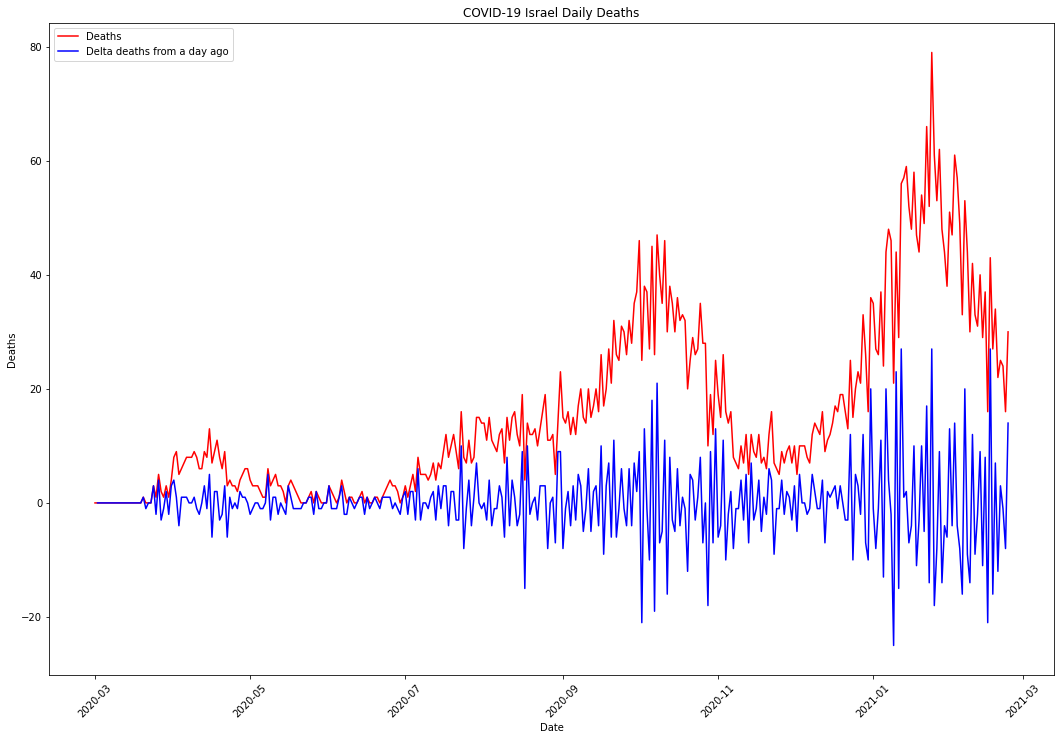

In [56]:
fig, ax = plt.subplots(figsize=(18, 12))

# Add x-axis and y-axis
ax.plot(new_df.date_as_date,
       new_df['daily_deaths'],
       label='Deaths',
       color='red')
# add dashboard
ax.plot(new_df.date_as_date,
       new_df['delta_deaths_raw1'],
       label='Delta deaths from a day ago',
       color='blue')
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Deaths",
       title="COVID-19 Israel Daily Deaths")

plt. xticks(rotation=45)
plt.legend(loc='upper left')
# put in lines for lockdowns

### Jump.jump, jump...let's instead do it on the smoothed, and subtract the day before and the week before

In [57]:
new_df['delta_deaths_from_smoothed_1day'] = new_df['daily_deaths_smooth'] - new_df['daily_deaths_smooth'].shift(1)
new_df['delta_deaths_from_smoothed_1week'] = new_df['daily_deaths_smooth'] - new_df['daily_deaths_smooth'].shift(7)

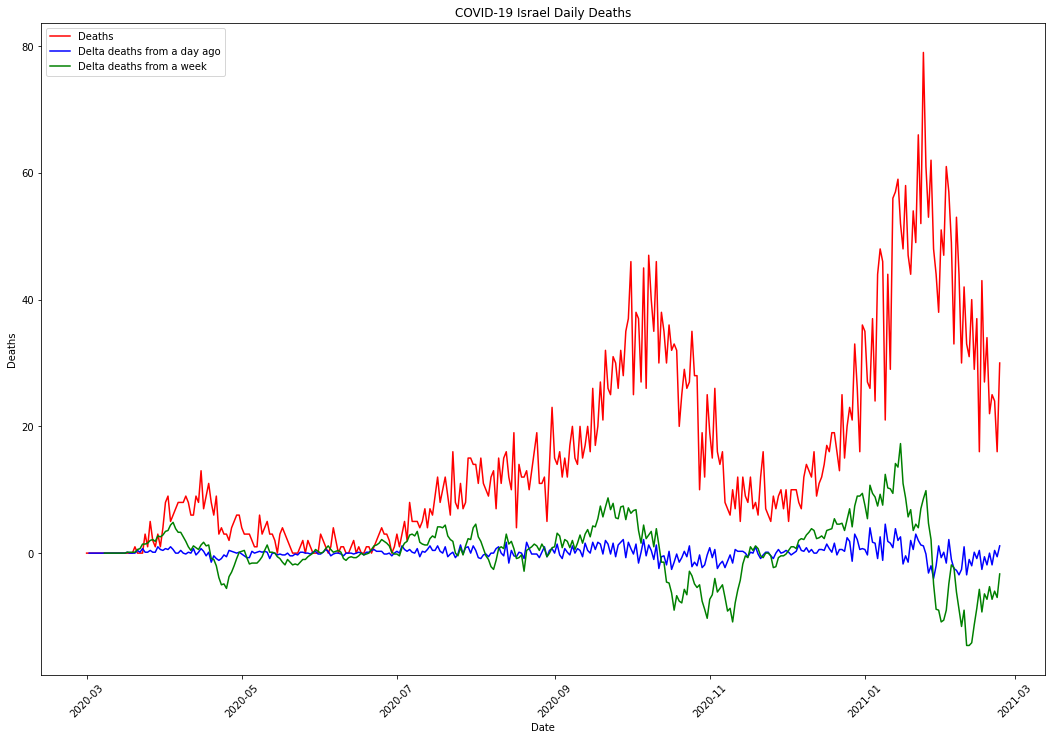

In [59]:
# and look
fig, ax = plt.subplots(figsize=(18, 12))

# Add x-axis and y-axis
ax.plot(new_df.date_as_date,
       new_df['daily_deaths'],
       label='Deaths',
       color='red')
# add dashboard
ax.plot(new_df.date_as_date,
       new_df['delta_deaths_from_smoothed_1day'],
       label='Delta deaths from a day ago',
       color='blue')

ax.plot(new_df.date_as_date,
       new_df['delta_deaths_from_smoothed_1week'],
       label='Delta deaths from a week',
       color='green')
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Deaths",
       title="COVID-19 Israel Daily Deaths")

plt. xticks(rotation=45)
plt.legend(loc='upper left')

In [60]:
new_df.to_csv('for_enis_december16.csv')